In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
import os



In [28]:
# using os to read all csv files in the directory
def read_all_data(directory):
    all_files = os.listdir(directory)
    all_data = pd.DataFrame()
    for file in all_files:
        if file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path, encoding='utf-8')
            all_data = pd.concat([all_data, df], ignore_index=True)
    return all_data

In [29]:
df = read_all_data('./Data/')

print(df.shape)


(7095, 6)


In [30]:
df.head()

,Unnamed: 0,product_name,review_text,product_rating,review_date,avg_rating
0,0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


In [31]:
# using .info() to get the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7095 non-null   int64  
 1   product_name    7095 non-null   object 
 2   review_text     7069 non-null   object 
 3   product_rating  7095 non-null   int64  
 4   review_date     7095 non-null   object 
 5   avg_rating      7095 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 332.7+ KB


### DataFrame Overview

The dataset `df` contains **7095 rows** and **6 columns**. Below is a detailed explanation of the columns and their characteristics:

1. **Unnamed: 0**: 
  - Type: Integer
  - Description: index or identifier for each row.

2. **product_name**: 
  - Type: String
  - Description: Contains the names of the products being reviewed.

3. **review_text**: 
  - Type: String
  - Description: Contains the text of the reviews. 
  - Note: This column has **7069 non-null values**, indicating some missing data.

4. **product_rating**: 
  - Type: Integer
  - Description: Represents the rating given to the product (e.g., 1 to 5).

5. **review_date**: 
  - Type: String
  - Description: Represents the date when the review was submitted. 
  - Note: This column may need to be converted to a datetime format for further analysis.

6. **avg_rating**: 
  - Type: Float
  - Description: Represents the average rating of the product.

### Summary Statistics
- **Total Rows**: 7095
- **Total Columns**: 6

### Observations
- The `review_text` column contains some missing values, which we will need to be handled during data preprocessing.
- The `review_date` column is currently stored as a string and will require conversion to a datetime format for time-based analysis.
- The dataset provides a comprehensive view of product reviews, including textual feedback, ratings, and submission dates, making it suitable for sentiment analysis, trend analysis, and other exploratory tasks.

# Data Preprocessing

In [32]:
# checking for the sum of null values in each column
df.isnull().sum() 

Unnamed: 0         0
product_name       0
review_text       26
product_rating     0
review_date        0
avg_rating         0
dtype: int64

In [33]:
# dropping rows with missing values
df.dropna(axis=0, inplace=True)

In [34]:
# converting the 'review_date' column to datetime format
df['review_date'] = pd.to_datetime(df['review_date'], format='%m/%d/%Y', errors='coerce')
# checking the data types again after conversion  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7069 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7069 non-null   int64         
 1   product_name    7069 non-null   object        
 2   review_text     7069 non-null   object        
 3   product_rating  7069 non-null   int64         
 4   review_date     7069 non-null   datetime64[ns]
 5   avg_rating      7069 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 386.6+ KB


In [35]:
df['review_date'].min(), df['review_date'].max()

(Timestamp('2008-12-14 00:00:00'), Timestamp('2025-02-10 00:00:00'))

## EDA

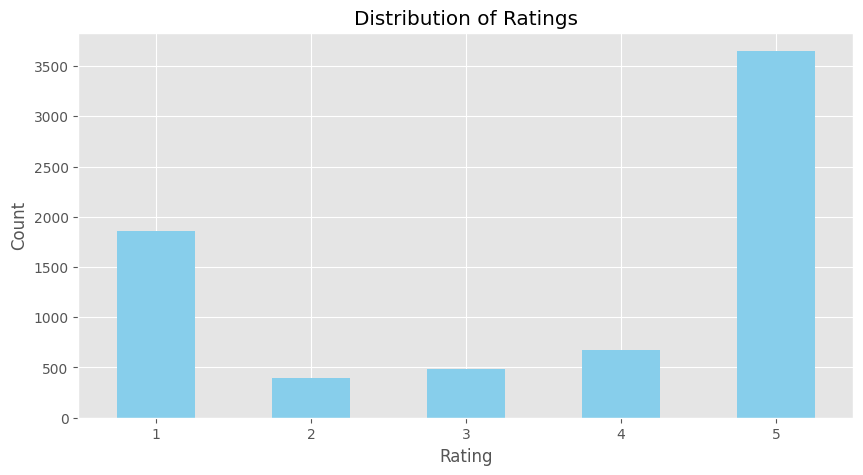

In [36]:
# checking the distribution of ratings    
df['product_rating'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Distribution of Ratings')  
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


1. **Rating 5 Dominates**: The highest bar corresponds to a rating of 5, indicating that most customers gave the highest rating to the products.
2. **Lower Ratings are Less Frequent**: Ratings 1 and 2 have significantly fewer reviews, suggesting that fewer customers were dissatisfied with the products.
3. **Balanced Mid-Ratings**: Ratings 3 and 4 have moderate counts, showing a balanced distribution of neutral to positive feedback.
4. **Overall Sentiment**: The chart suggests a generally positive sentiment among reviewers, as higher ratings (4 and 5) dominate the distribution.

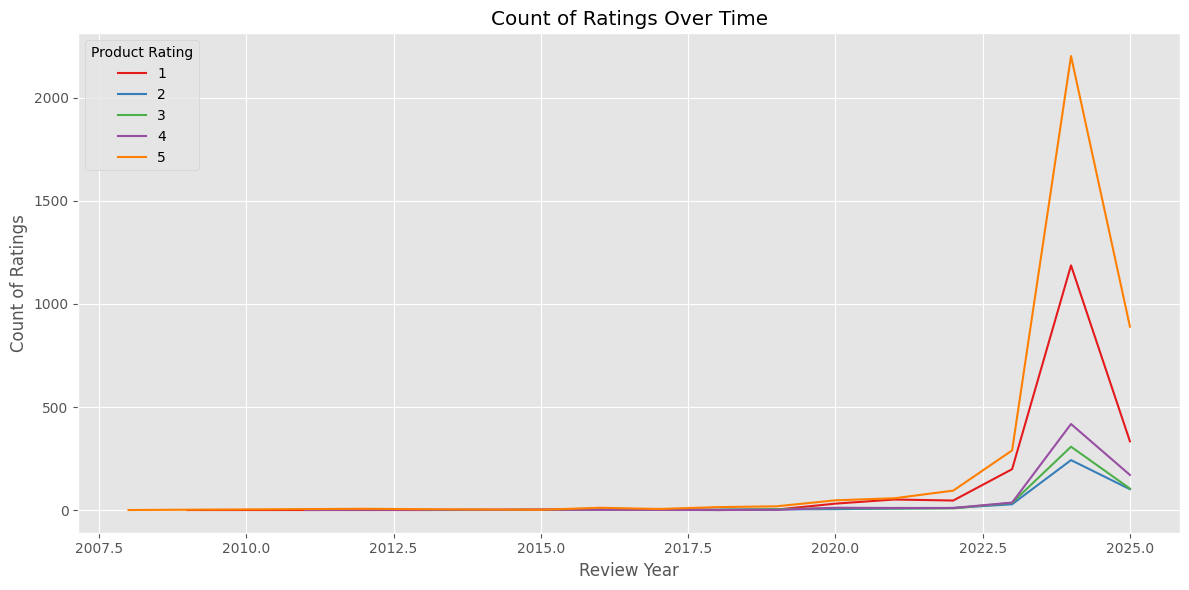

In [37]:
# count of rating over time coloer coded by rating
df['review_year'] = df['review_date'].dt.year 
fig = plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='review_year',y='product_rating', hue='product_rating', estimator='count', errorbar=None, palette='Set1')
plt.title('Count of Ratings Over Time')
plt.xlabel('Review Year')
plt.ylabel('Count of Ratings')
plt.legend(title='Product Rating')
plt.tight_layout()
plt.show()

## Basic NLTK

In [38]:
df['review_text'][50]

'Xbox series x, has been well with the money and become even an investment, that my whole family loves and enjoys, it has given my children something to look forward to, and helped pull them out of extreme depression, having opened doors for them to vent. No Regrets here, the company shipped my Xbox fast, and wrapped it very well, to protect it from damages or being tossed about. Would give them a 5 of 5 as well.  Would purchase again.'

## VADER Sentiment Scoring

We will Use NLTK's `SentimentIntensityAnalyzer` to get the pos/neu/neg scores of the texts
- This uses a "Bag of Words" approach:
  1. Stop words are removed
  2. Each word is scored and combined to a total score

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [40]:
vader_df = df.copy()

In [41]:
sia = SentimentIntensityAnalyzer()

In [42]:
sia.polarity_scores(vader_df['review_text'][50])

{'neg': 0.118, 'neu': 0.712, 'pos': 0.169, 'compound': 0.5945}

**Interpreting Polarity Scores from SentimentIntensityAnalyzer**
The `SentimentIntensityAnalyzer` from NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) provides a dictionary of polarity scores for a given text. These scores help in understanding the sentiment of the text. The dictionary contains the following keys:

1. **`neg` (Negative)**:
  - Represents the proportion of negative sentiment in the text.
  - Ranges from 0 to 1, where 0 indicates no negativity and 1 indicates entirely negative sentiment.

2. **`neu` (Neutral)**:
  - Represents the proportion of neutral sentiment in the text.
  - Ranges from 0 to 1, where 0 indicates no neutrality and 1 indicates entirely neutral sentiment.

3. **`pos` (Positive)**:
  - Represents the proportion of positive sentiment in the text.
  - Ranges from 0 to 1, where 0 indicates no positivity and 1 indicates entirely positive sentiment.

4. **`compound` (Compound Score)**:
  - A normalized, weighted composite score that combines the `neg`, `neu`, and `pos` scores.
  - Ranges from -1 to 1:
    - A score closer to -1 indicates a strongly negative sentiment.
    - A score closer to 1 indicates a strongly positive sentiment.
    - A score around 0 indicates a neutral sentiment.

In [43]:
# run polarity scores on all reviews and save to a new column
tqdm.pandas(desc="Calculating Sentiment Scores")
res = {}
for i, row in tqdm(vader_df.iterrows(), total=len(vader_df)):
    res[i] = sia.polarity_scores(row['review_text'])
vader_df['sentiment'] = pd.Series(res).apply(lambda x: x['compound'])
    

  0%|          | 0/7069 [00:00<?, ?it/s]

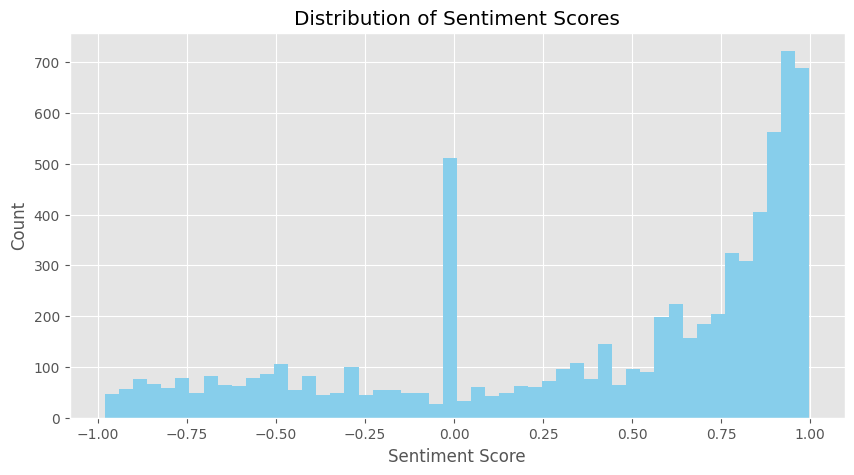

In [45]:
# checking the distribution of sentiment scores
vader_df['sentiment'].hist(bins=50, figsize=(10, 5), color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_20352\58939092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vader_df, x='product_rating', y='sentiment', palette='Set1')


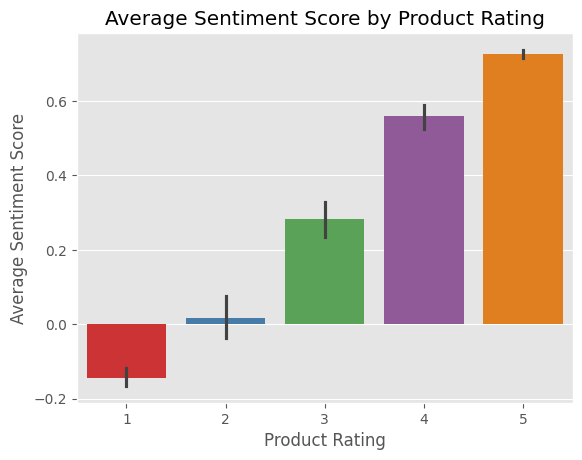

In [47]:
ax = sns.barplot(data=vader_df, x='product_rating', y='sentiment', palette='Set1')
plt.title('Average Sentiment Score by Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.show()
